✓ Datos cargados correctamente.
✓ Datos preparados y divididos.
✓ Modelo de Árbol de Decisión entrenado.

--- RESULTADOS DEL MODELO ---
Accuracy (Exactitud):  0.6485
Precision (Precisión): 0.6605
Recall (Sensibilidad): 0.6453
F1-Score:              0.6417

✓ Gráfico 'matriz_confusion.png' generado.
✓ Gráfico 'arbol_decision.png' generado.


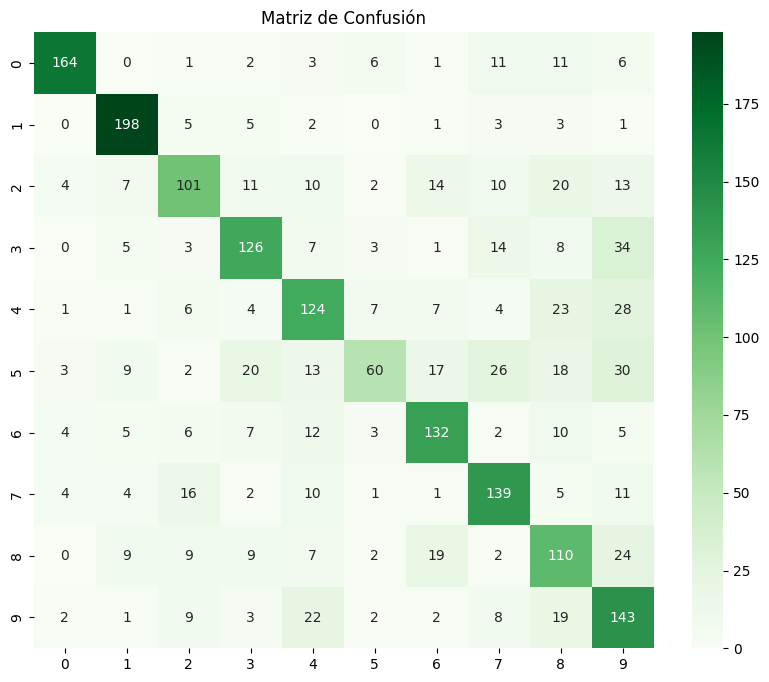

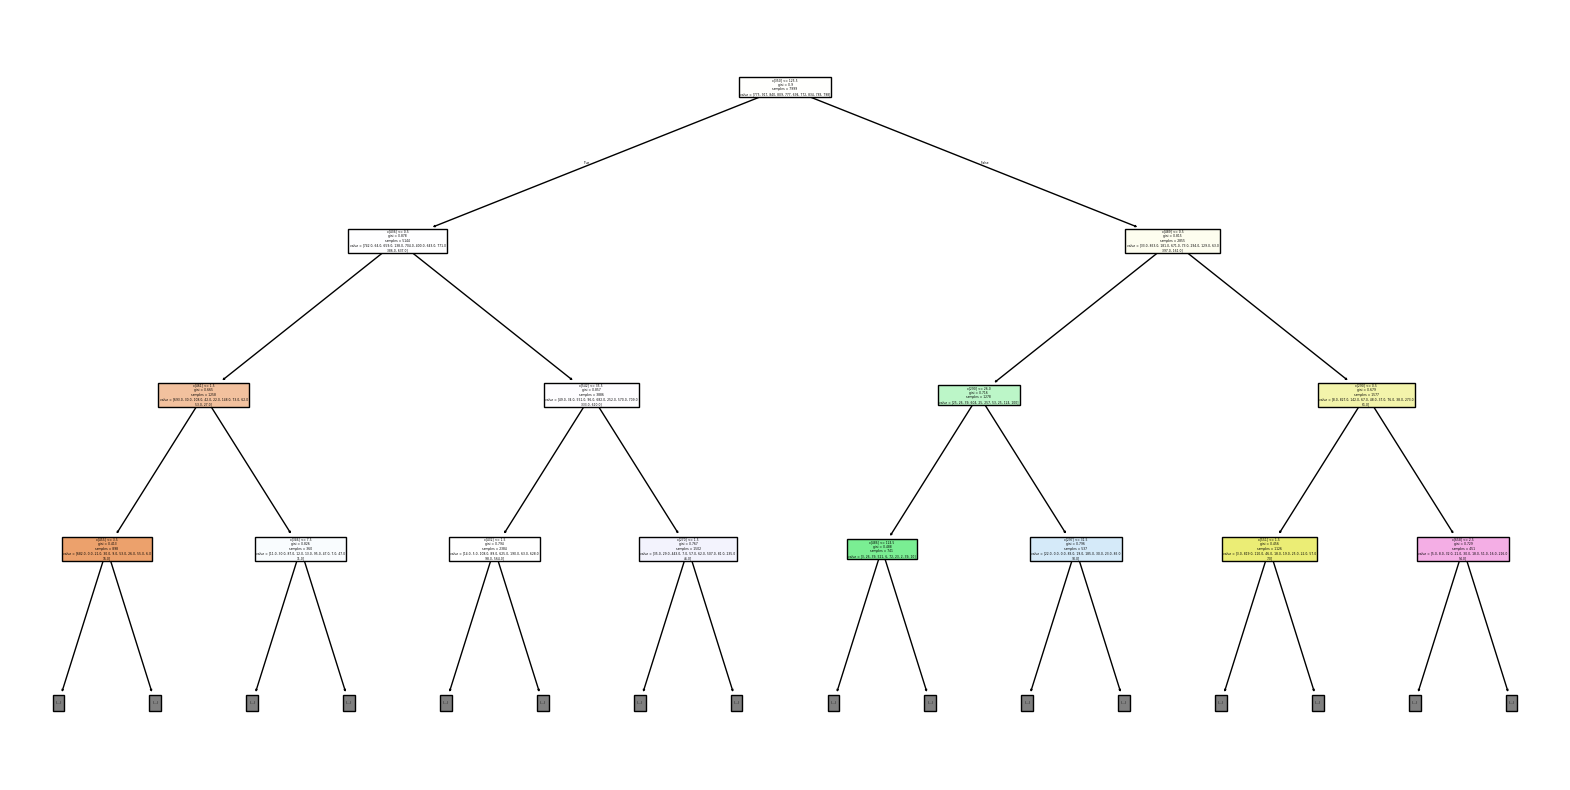

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def ejecutar_sistema():
    # --- 1. CARGA DE DATOS ---
    try:
        ruta = '/content/sample_data/mnist_test.csv'
        df = pd.read_csv(ruta)
        print("✓ Datos cargados correctamente.")
    except FileNotFoundError:
        print("Error: No se encontró el archivo. Asegúrate de que esté en la carpeta sample_data.")
        return

    # --- 2. PREPARACIÓN DE DATOS ---
    # Divido variables de entrada (X) y objetivo (y)

    X = df.iloc[:, 1:] # Todas las columnas excepto la primera
    y = df.iloc[:, 0]  # La primera columna es la etiqueta

    # Divido los datos en entrenamiento y prueba (Crea X_test y y_test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("✓ Datos preparados y divididos.")

    # --- 3. ENTRENAMIENTO DEL MODELO ---
    # Uso DecisionTreeClassifier como pide la tarea
    classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
    classifier.fit(X_train, y_train)
    print("✓ Modelo de Árbol de Decisión entrenado.")

    # --- 4. PREDICCIONES ---
    # Uso el set de prueba para generar resultados
    y_pred = classifier.predict(X_test)

    # --- 5. EVALUACIÓN Y MÉTRICAS ---
    # Calculo los valores solicitados
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("\n--- RESULTADOS DEL MODELO ---")
    print(f"Accuracy (Exactitud):  {acc:.4f}")
    print(f"Precision (Precisión): {prec:.4f}")
    print(f"Recall (Sensibilidad): {rec:.4f}")
    print(f"F1-Score:              {f1:.4f}")

    # Guardar como imagen

    # Matriz de Confusión
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Matriz de Confusión')
    plt.savefig('matriz_confusion.png')
    print("\n✓ Gráfico 'matriz_confusion.png' generado.")

    # Estructura del Árbol
    plt.figure(figsize=(20, 10))
    plot_tree(classifier, filled=True, max_depth=3)
    plt.savefig('arbol_decision.png')
    print("✓ Gráfico 'arbol_decision.png' generado.")

# Ejecución de la línea de ensamblaje
if __name__ == "__main__":
    ejecutar_sistema()